# Spatial Analysis Methodology

### 1. Ask questions: 
Formulate hypotheses and spatial
questions.

### 2. Explore the data: 
Examine the data quality,
completeness, and measurement limitations (scale
and resolution) to determine the level of analysis and
interpretation that can be supported.

### 3. Analyze and model: 
Break the problem down into
solvable components that can be modeled. Quantify
and evaluate the spatial questions.

### 4. Interpret the results: 
Evaluate and analyze the results
in the context of the question posed, data limitations,
accuracy, and other implications.

### 5. Repeat as necessary: 
Spatial analysis is a continuous
and iterative process that often leads to further
questions and refinements.

### 6. Present the results: 
The best information and
analysis becomes increasingly valuable when it can be
effectively presented and shared with a larger audience.

### 7. Make a decision: 

Spatial analysis and GIS are used to support the 
decision-making process. A successful spatial analysis 
process often leads to the understanding necessary to 
drive decisions and action.

# 1. Ask Questions

### Regarding Bridge Infrastructure

- Where in the country are the bridges in highest danger of causing safety issues?

- Which states have the worst conditions for bridges in the United States? 

- Which states have the best conditions for bridges in the United States?

- Where are the communities that are most reliant on bridges?

- Where are the communities that are most reliant on bridges that are deemed structurally deficient?

- Given frequency of use, relative economic importance, and potential consequences of failure, which bridges require the most immediate attention?

##### Understanding Where


### Regarding Transit

- Where are the transit deserts in the Washington DC Metro? Consider not just places without access to public transit, but also places with access to poor-quality public transit (e.g. low frequency of routes)

### Regarding Infrastructure Investment Projects

- Given the benefits and circumstances for Boston's big-dig, which other cities would benefit the greatest from a similar project?

- Where are the locations where people most directly invest on their use of infrastructure? (i.e. use of toll-roads)

- Where are the locations where people most indirectly invest on their use of infrastructure? (i.e. all infrastructure paid for via sales or gas taxes)

### Regarding Ports

- Can we classify each of the nation's ports into a typology based on the seven designations assigned by MARAD?

- Where are the nation's ferry routes in any given month? 

# 2. Explore Data

## Regarding Bridge Infrastructure

Import needed modules

In [2]:
import pandas as pd
import arcgis
import getpass

Set workspace

In [3]:
workspace = r"C:\Users\albe9057\Documents\GitHub\Infrastructure_Analysis"

In [5]:
portals_dict = {
    "esrifederal_gis": r"https://esrifederal.maps.arcgis.com",
    "natgov_gis": r"http://esri-natgov105.eastus.cloudapp.azure.com/arcgis",
    "dot_gis": r"http://dot.esri.com/portal",
    "dev_gis": r"http://govdev.eastus.cloudapp.azure.com/arcgis",
    "local_gis": r"https://anieto.esri.com/arcgis",
    "brett_gis": r"https://agsbase.dcwebgis.net/portal",
    "bill_gis": r"https://idt.esri.com/portal"
}

gis_url = portals_dict["bill_gis"]

if gis_url == portals_dict["esrifederal_gis"]:
    gis_app_id = r"wt3QUR1M4eum0TVI"
    print("Attempting to log in to '{0}'...".format(gis_url))
    gis = arcgis.gis.GIS(gis_url, client_id=gis_app_id)
    print("Successfully logged in as: " + gis.properties.user.username)
else:
    gis_username = getpass.getpass(prompt="Username: ")
    gis_pw = getpass.getpass(prompt="Password: ")
    print("Attempting to log in to '{0}'...".format(gis_url))
    gis = arcgis.gis.GIS(gis_url, gis_username, gis_pw, verify_cert=False)
    print("Successfully logged in as: " + gis.properties.user.username)

Username: ········
Password: ········
Attempting to log in to 'https://idt.esri.com/portal'...
Successfully logged in as: anieto


#### Regarding States Bridge Condition Statistics

Search for states content in the GIS

<Item title:"US_States" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
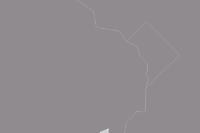

In [74]:
# search for USA states - area / polygon data
states_search = gis.content.search("title:US_states and owner:albe9057@esri.com_esrifederal", 
                                   "feature layer")
states_item = states_search[0]
states_item

Set reference to FHWA States HTML Table

In [27]:
fhwa_states_bridges_url = r"https://www.fhwa.dot.gov/bridge/nbi/no10/condition16.cfm"

In [28]:
fhwa_states_bridges_df = pd.read_html(fhwa_states_bridges_url)[0]
fhwa_states_bridges_df

,State,# All Bridges,# Good,# Fair,# Poor,Total Area,Good Area,Fair Area,Poor Area
0,ALABAMA,16098,7040,8338,720,9238041,3655465,5329991,252585
1,ALASKA,1488,644,702,141,710704,272581,378038,60040
2,ARIZONA,8154,4931,3042,181,5055871,2531160,2382734,141977
3,ARKANSAS,12871,6984,5291,596,6381829,3181917,2786039,413873
4,CALIFORNIA,25431,16788,7439,1204,29478068,18644074,9141389,1692605
5,COLORADO,8682,3861,4364,455,4928137,2510935,2196537,220495
6,CONNECTICUT,4214,1250,2628,336,3265917,598052,2211627,456237
7,DELAWARE,877,267,567,43,978596,164793,761239,52565
8,DIST. OF COL.,245,67,169,9,568827,86987,453801,28039
9,FLORIDA,12313,8534,3545,233,16759416,11232342,5149876,376033


In [29]:
fhwa_states_bridges_df.to_csv(workspace + "//fhwa_states_bridge_stats.csv")
fhwa_states_bridges_csv = workspace + "//fhwa_states_bridge_stats.csv"
fhwa_states_bridges_csv

'C:\\Users\\albe9057\\Documents\\GitHub\\Infrastructure_Analysis//fhwa_states_bridge_stats.csv'

In [30]:
fhwa_states_bridges_csv_item = gis.content.add({}, fhwa_states_bridges_csv)
fhwa_states_bridges_csv_item

<Item title:"fhwa_states_bridge_stats" type:CSV owner:albe9057@esri.com_esrifederal>

<Item title:"fhwa_states_bridge_stats" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
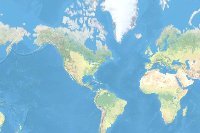

In [76]:
fhwa_states_bridges_item = fhwa_states_bridges_csv_item.publish(overwrite=True)
fhwa_states_bridges_item

In [77]:
m = gis.map("United States")
m

In [78]:
m.add_layer(states_item)
m.add_layer(fhwa_states_bridges_item)

Aggregate stats by state

In [79]:
bridges_fl = fhwa_states_bridges_item.layers[0]
states_fl = states_item.layers[0]

In [80]:
states_fl

<FeatureLayer url:"https://services.arcgis.com/hRUr1F8lE8Jq2uJo/arcgis/rest/services/US_States/FeatureServer/0">

In [81]:
#query the fields in eq_fl layer
for field in bridges_fl.properties.fields:
    print(field['name'])

State
F__All_Bridges
F__Good
F__Fair
F__Poor
Total_Area
Good_Area
Fair_Area
Poor_Area
FID


In [82]:
# similarly for states data
for field in states_fl.properties.fields:
    print(field['name'], end="\t")

OBJECTID	STATE_NAME	STATE_FIPS	SUB_REGION	STATE_ABBR	POPULATION	POP_SQMI	POP2010	POP10_SQMI	WHITE	BLACK	AMERI_ES	ASIAN	HAWN_PI	HISPANIC	OTHER	MULT_RACE	MALES	FEMALES	AGE_UNDER5	AGE_5_9	AGE_10_14	AGE_15_19	AGE_20_24	AGE_25_34	AGE_35_44	AGE_45_54	AGE_55_64	AGE_65_74	AGE_75_84	AGE_85_UP	MED_AGE	MED_AGE_M	MED_AGE_F	HOUSEHOLDS	AVE_HH_SZ	HSEHLD_1_M	HSEHLD_1_F	MARHH_CHD	MARHH_NO_C	MHH_CHILD	FHH_CHILD	FAMILIES	AVE_FAM_SZ	HSE_UNITS	VACANT	OWNER_OCC	RENTER_OCC	NO_FARMS12	AVE_SIZE12	CROP_ACR12	AVE_SALE12	SQMI	Shape__Area	Shape__Length	

In [84]:
from arcgis.features import summarize_data
sum_fields = ['F__All_Bridges', 'F__Good', 'F__Fair', 'F__Poor',
              'Total_Area', 'Good_Area', 'Fair_Area', 'Poor_Area']
bridge_summary = summarize_data.aggregate_points(point_layer = bridges_fl,
                                            polygon_layer = states_fl,
                                            keep_boundaries_with_no_points=True,
                                            summary_fields=sum_fields)

{"messageCode": "AO_100001", "message": "AggregatePoints failed."}
Failed to execute (AggregatePoints).
Failed.


Exception: Job failed.

#### Regarding Individual Bridge Conditions 

Set reference to downloaded NBI data

In [1]:
nbi_all = r"D:\ANieto_SolutionEngineer\Data\DOT\FHWA\NBI\2017allstatesallrecsdel\2017AllRecordsDelimitedAllStates.txt"
nbi_highways = r"D:\ANieto_SolutionEngineer\Data\DOT\FHWA\NBI\2017hwybronlyonefile\2017HwyBridgesDelimitedAllStates.txt"

In [7]:
nbi_all_df = pd.read_csv(nbi_all, encoding="ISO-8859-1")
nbi_all_df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,7,17,31,36,37,38,39,41,44,61,63,66,67,68,69,70,71,73,75,76,77,79,86,87,88,96,98,102,106,107,108,109,113,114,119,120,121,123,124,130,131,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.5,0
3,1,000000883039900,1,4.0,1.0,00088,0.0,2,59.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.2,0
4,1,000001014002450,1,3.0,1.0,00101,0.0,2,79.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,49.9,2
5,1,000001331700710,1,6.0,2.0,00000,0.0,2,33.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,61.3,2
6,1,000002,1,4.0,1.0,00000,0.0,10,127.0,0.0,...,6800008,0.0,14.0,17.0,NaN,NaN,1,NaN,16.9,1
7,1,000004,1,4.0,1.0,00000,0.0,10,127.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,1
8,1,000004504800350,1,6.0,8.0,00000,0.0,1,95.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72.8,0
9,1,000005,1,5.0,0.0,00000,0.0,10,75.0,48808.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,22.1,1


In [8]:
nbi_highways_df = pd.read_csv(nbi_highways, encoding="ISO-8859-1")
nbi_highways_df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.5,0
3,1,000000883039900,1,4.0,1.0,00088,0.0,2,59.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.2,0
4,1,000001014002450,1,3.0,1.0,00101,0.0,2,79.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,49.9,2
5,1,000001331700710,1,6.0,2.0,00000,0.0,2,33.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,61.3,2
6,1,000002,1,4.0,1.0,00000,0.0,10,127.0,0,...,6800008,0.0,14.0,17.0,NaN,NaN,1,NaN,16.9,1
7,1,000004,1,4.0,1.0,00000,0.0,10,127.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,1
8,1,000004504800350,1,6.0,8.0,00000,0.0,1,95.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,72.8,0
9,1,000005,1,5.0,0.0,00000,0.0,10,75.0,48808,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,22.1,1


# 3. Analyze and Model

# 4. Interpret the Results

# 5. Repeat as Necessary

# 6. Present the Results

# 7. Make a Decision